#### Insights:
1. sub_id 6 is all empty since block 7

In [1]:
import sys
import pandas as pd
import numpy as np
import ipywidgets
import warnings
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

CODE_PATH = r"C:\personal\proj_university\seminar\eegtools"
sys.path.insert(0, CODE_PATH)
import data_ingestion, plot, analysis, dashboard
data = data_ingestion.mat_data

In [39]:
empty_name = data['subjects'][data['null'][:,0]]
df = pd.DataFrame({'sub_id':data['null'][:,0],
                   'name':empty_name,
                   'group': data['group'][data['null'][:,0]],
                   'trial':data['null'][:,1],
                   'block':data['null'][:,2]})

df[['trial','block']] = df[['trial','block']].apply(lambda val: val+1)

In [40]:
agg = (df.groupby(['sub_id','name','group']).count()['trial']/340).sort_values(ascending=False).reset_index()
agg = agg.rename(columns={"trial":'rate'})

In [41]:
# writer = pd.ExcelWriter(r"C:\personal\proj_university\seminar\null_trials.xlsx", engine = 'xlsxwriter')
# df.to_excel(writer, sheet_name="null", index=False)
# agg.to_excel(writer, sheet_name="rate_by_subject", index=False)
# writer.save()
# writer.close()

In [86]:
total_null_rate = df.shape[0]/(47*10*34)

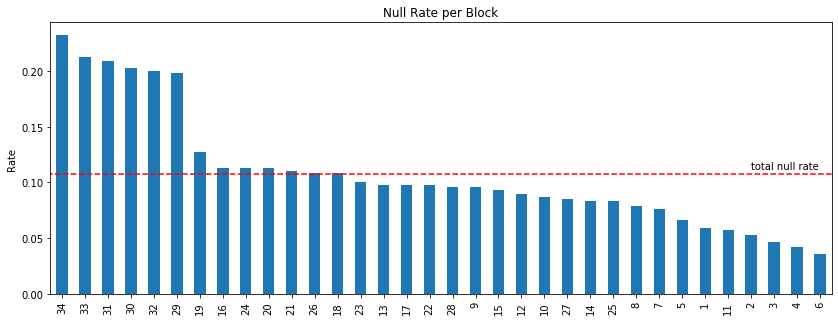

In [124]:
# indeed affect
(df['block'].value_counts()/(47*10)).plot(kind='bar', figsize=(14,5), title="Null Rate per Block")
plt.ylabel("Rate")
plt.plot(np.arange(start=-1,stop=1000),np.repeat(total_null_rate,1001), c="red", linestyle="--")
plt.text(30,total_null_rate+15**(-2),"total null rate")
plt.show()

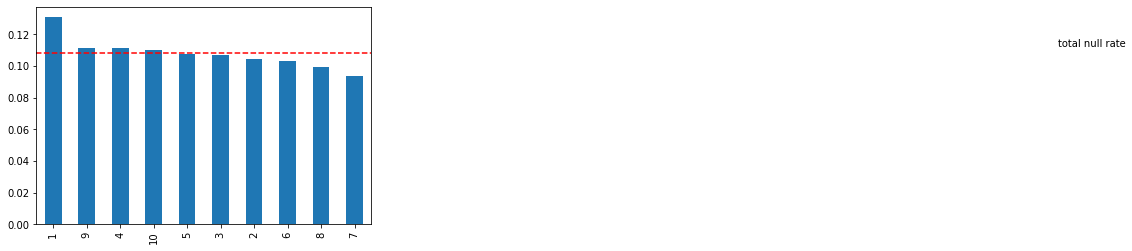

In [126]:
# not affect
(df['trial'].value_counts()/(34*47)).plot(kind='bar')
plt.plot(np.arange(start=-1,stop=1000),np.repeat(total_null_rate,1001), c="red", linestyle="--")
plt.text(30,total_null_rate+15**(-2),"total null rate")
plt.show()

In [171]:
def plot(df,col):
    total_null_rate = df.shape[0]/(47*10*34)
    counts = df['block'].value_counts()
    norm = 10 if col=="block" else 34
    (counts/(47*norm)).plot(kind='bar', figsize=(14,5), title=col)
    plt.ylabel("Rate")
    plt.plot(np.arange(start=-1,stop=1000),np.repeat(total_null_rate,1001), c="red", linestyle="--")
    plt.text(30,total_null_rate+15**(-2),"total null rate")
    plt.show()

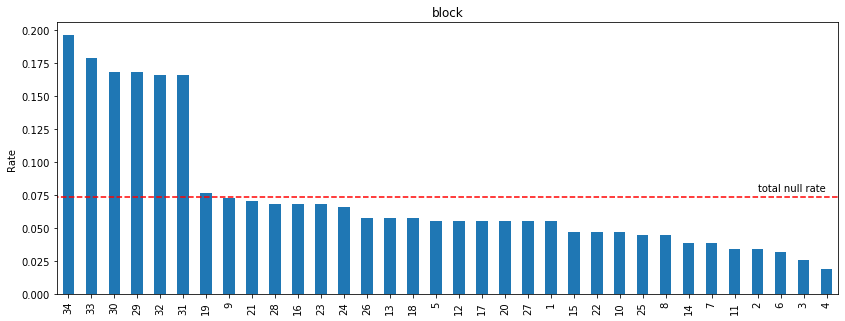

In [178]:
# len(df['name'].unique())
plot(df.loc[~df.sub_id.isin([44,6,27])],"block")

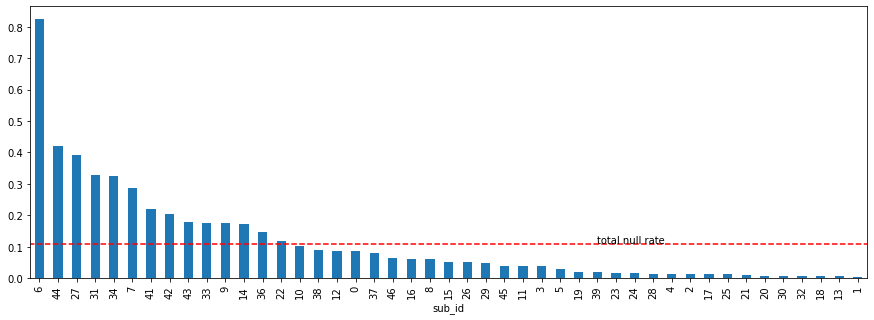

In [131]:
agg.set_index('sub_id')['rate'].plot(kind="bar", figsize=(15,5))
plt.plot(np.arange(start=-1,stop=1000),np.repeat(total_null_rate,1001), c="red", linestyle="--")
plt.text(30,total_null_rate+15**(-2),"total null rate")
plt.show()

In [153]:
df.loc[df['sub_id']==44].sort_values(["block","trial"])

,sub_id,name,group,trial,block
1547,44,YOZM7340,ASD,1,1
1572,44,YOZM7340,ASD,2,2
1631,44,YOZM7340,ASD,6,2
1645,44,YOZM7340,ASD,7,2
1658,44,YOZM7340,ASD,8,2
...,...,...,...,...,...
1569,44,YOZM7340,ASD,1,30
1570,44,YOZM7340,ASD,1,31
1571,44,YOZM7340,ASD,1,32
1588,44,YOZM7340,ASD,2,34


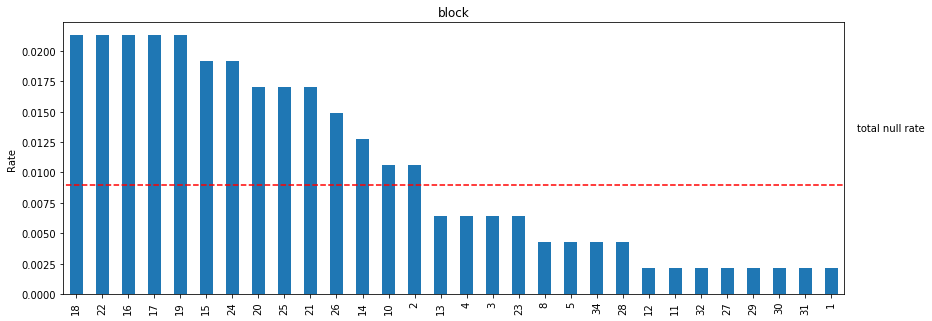

In [190]:
plot(df.loc[df['sub_id']==44],"block")
# df.loc[df['sub_id']==44, block]